In [9]:
from pandas_datareader import data
start_date = '2017-10-30'
end_date = '2020-10-30'
tickers = ['NVDA','MSCI','^FVX','^TNX','^GSPC']
data = data.DataReader(tickers, 'yahoo', start_date, end_date)['Close']

In [10]:
#data_month = data.asfreq('M', method='ffill')
#data = data.resample('1M').mean()
#data = data.pct_change()[1:]
data = data.resample('1M').mean()
#data["Rm-Rf"] = data['Open']['MSCI'] - data['Open']['^TNX']
#data["Ri-Rf"] = data['Close']['NVDA'] - data['Close']['^TNX']
#data["Rm-Rf"] = data['Close']['MSCI'] - data['Close']['^TNX']
#data.to_excel('data_return.xlsx', engine='xlsxwriter')

In [11]:
data['NVDA'] = data['NVDA'].pct_change()
data['MSCI'] = data['MSCI'].pct_change()
data['^GSPC'] = data['^GSPC'].pct_change()
data['^TNX'] = data['^TNX']/100
data = data.iloc[1:]
data

Symbols,NVDA,MSCI,^FVX,^TNX,^GSPC
Date,,,,,
2017-11-30,0.024594,0.075991,2.047750,0.023548,0.007599
2017-12-31,-0.082112,0.008927,2.177650,0.024030,0.027273
2018-01-31,0.178345,0.064031,2.380095,0.025829,0.047090
2018-02-28,0.040291,0.044745,2.598105,0.028605,-0.030342
2018-03-31,0.017501,0.073778,2.628095,0.028433,-0.000880
2018-04-30,-0.061799,-0.025641,2.700000,0.028661,-0.018185
2018-05-31,0.090437,0.058661,2.815500,0.029781,0.018039
2018-06-30,0.040863,0.069014,2.774429,0.029133,0.019567
2018-07-31,-0.030411,0.011217,2.780900,0.028929,0.014265


In [14]:
data["Rm-Rf"] = data['^GSPC'] - data['^TNX']
data["Ri-Rf"] = data['NVDA'] - data['^TNX']

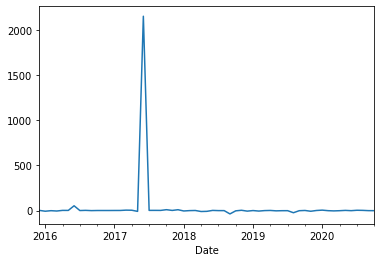

In [222]:
from scipy.stats import mstats
data["Ri-Rf"] = mstats.winsorize(data["Ri-Rf"], limits=[0.00, 0.01])
data["Ri-Rf"].plot()

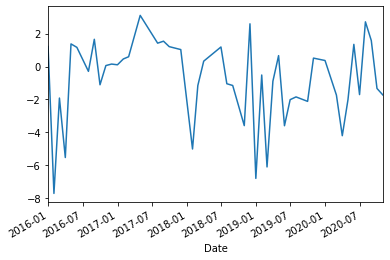

In [223]:
data_ri = data["Ri-Rf"][data["Ri-Rf"].between(data["Ri-Rf"].quantile(.1), data["Ri-Rf"].quantile(.90))]
data_ri.plot()

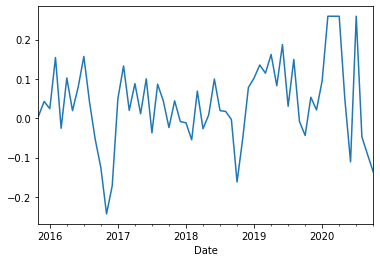

In [218]:
data["Rm-Rf"] = mstats.winsorize(data["Rm-Rf"], limits=[0.0, 0.05])
data["Rm-Rf"].plot()

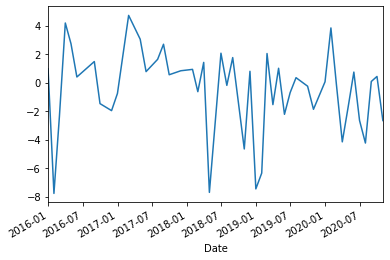

In [224]:
data_rm = data["Rm-Rf"][data["Rm-Rf"].between(data["Rm-Rf"].quantile(.1), data["Rm-Rf"].quantile(.90))]
data_rm.plot()

In [25]:
import statsmodels.api as sm
from statsmodels import regression

X = data["Rm-Rf"].values
#X = data['Open']['^GSPC'].values

#Y = data['Open']['NVDA'].values
Y= data["Ri-Rf"].values

X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = regression.linear_model.OLS(Y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     33.73
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           1.53e-06
Time:                        13:37:21   Log-Likelihood:                 41.595
No. Observations:                  36   AIC:                            -79.19
Df Residuals:                      34   BIC:                            -76.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0316      0.013      2.343      0.0

In [27]:
prediction = results.predict(X)
print(prediction)

[ 0.00519952  0.0369561   0.06677077 -0.06595093 -0.01691475 -0.04592568
  0.01216051  0.01576095  0.00732444  0.02179637  0.00716174 -0.08680522
 -0.05703747 -0.11011833  0.01262695  0.0809079   0.01855366  0.04863049
 -0.03599741  0.01786044  0.05816716 -0.04976827  0.05194328  0.00090257
  0.07218277  0.03910879  0.05540637  0.00629394 -0.29822513  0.08916166
  0.11488311  0.12449787  0.07628066  0.11588834  0.00766716  0.04493654]


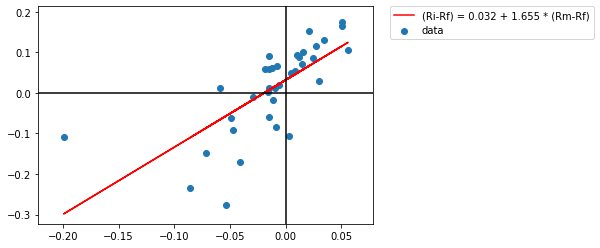

In [37]:
import matplotlib.pyplot as plt
import numpy as np
value_reg = "(Ri-Rf) = "+ str(np.round(results.params[0],3))+" + "+str(np.round(results.params[1],3))+" * (Rm-Rf)"
plt.scatter(data["Rm-Rf"].values,data["Ri-Rf"].values, label="data")
plt.plot(data["Rm-Rf"].values,prediction, c="r", label=value_reg)
plt.axhline(0, color='black')
plt.axvline(0, color='black')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()